In [1]:
import pandas as pd
import numpy as np
import nltk.data
from nltk import word_tokenize, sent_tokenize

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from gensim.models import word2vec

from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

%matplotlib inline
pd.set_option('max_colwidth', -1)

C:\Users\Enric\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [2]:
data = pd.read_csv('data_cleaned_20190514.csv') #13 - 8210
print(data.shape)
data.head(3)

(8192, 17)


,Player,Tag,TeamId,Team,DeckId,Archetype,Usage,CardKeysRaw,Games,Losses,Wins,BattleTime,date,CardKeysRawSorted,deck,times,deck_id_int
0,Raider™02,LGG0QU2,55,Black EF / PG / CTP - Jameo eSports,9246338,Hogrider,SameClan,"skeletons,ice-spirit,the-log,valkyrie,poison,electro-wizard,inferno-tower,hog-rider",1,1,0,2019-05-13,2019-05-13,"electro-wizard, hog-rider, ice-spirit, inferno-tower, poison, skeletons, the-log, valkyrie","electro-wizard, hog-rider, ice-spirit, inferno-tower, poison, skeletons, the-log, valkyrie",3,515
1,Kaiju JN,LYU9C09J,56,Black EF / PG / CTP - Kaiju eSports,9246056,Hogrider,Friendly,"skeletons,ice-spirit,the-log,valkyrie,poison,electro-wizard,inferno-tower,hog-rider",1,1,0,2019-05-12,2019-05-12,"electro-wizard, hog-rider, ice-spirit, inferno-tower, poison, skeletons, the-log, valkyrie","electro-wizard, hog-rider, ice-spirit, inferno-tower, poison, skeletons, the-log, valkyrie",3,515
2,MAD MCasc,R99YP00J,74,SLO - MAD Lions E.C.,9246027,Hogrider,SameClan,"skeletons,ice-spirit,the-log,valkyrie,poison,electro-wizard,inferno-tower,hog-rider",1,1,0,2019-05-12,2019-05-12,"electro-wizard, hog-rider, ice-spirit, inferno-tower, poison, skeletons, the-log, valkyrie","electro-wizard, hog-rider, ice-spirit, inferno-tower, poison, skeletons, the-log, valkyrie",3,515


In [3]:
data.shape

(8192, 17)

In [15]:
data = data.loc[data.index.repeat(data.Games)].reset_index(drop=True)
data.shape

(68110, 17)

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Enric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
EMBEDDING_DIM = 20

In [18]:
data['CardKeysRaw'] = data['CardKeysRaw'].apply(lambda x: ' '.join(x.split(',')))
data['CardKeysRaw'].head(3)

0    skeletons icespirit thelog valkyrie poison electrowizard infernotower hogrider
1    skeletons icespirit thelog valkyrie poison electrowizard infernotower hogrider
2    skeletons icespirit thelog valkyrie poison electrowizard infernotower hogrider
Name: CardKeysRaw, dtype: object

In [19]:
data['CardKeysRaw'] = data['CardKeysRaw'].str.replace('-', '')
sentences = [word.split() for word in data['CardKeysRaw'].values]
print(sentences[:3])
print(len(sentences))

[['skeletons', 'icespirit', 'thelog', 'valkyrie', 'poison', 'electrowizard', 'infernotower', 'hogrider'], ['skeletons', 'icespirit', 'thelog', 'valkyrie', 'poison', 'electrowizard', 'infernotower', 'hogrider'], ['skeletons', 'icespirit', 'thelog', 'valkyrie', 'poison', 'electrowizard', 'infernotower', 'hogrider']]
68110


In [20]:
%%time
modelWV = word2vec.Word2Vec(sentences, workers = 3, min_count=0, window = 7, size = EMBEDDING_DIM)
modelWV.train(sentences, total_examples=len(sentences), epochs=10)

Wall time: 6.12 s


In [26]:
modelWV.save("Cards_Embedding_v4")
#model = Word2Vec.load("word2vec_model_v1")

In [22]:
words = list(modelWV.wv.vocab)
print(words)
print(len(words))

['skeletons', 'icespirit', 'thelog', 'valkyrie', 'poison', 'electrowizard', 'infernotower', 'hogrider', 'barbarianbarrel', 'wallbreakers', 'dartgoblin', 'rascals', 'miner', 'icegolem', 'giantsnowball', 'bandit', 'hunter', 'battleram', 'elixircollector', 'threemusketeers', 'megaminion', 'babydragon', 'furnace', 'lumberjack', 'fireball', 'royalgiant', 'bats', 'darkprince', 'minions', 'infernodragon', 'zap', 'prince', 'giant', 'ramrider', 'megaknight', 'guards', 'musketeer', 'archers', 'earthquake', 'balloon', 'speargoblins', 'goblingang', 'tornado', 'icewizard', 'bombtower', 'freeze', 'giantskeleton', 'princess', 'minipekka', 'lightning', 'golem', 'pekka', 'tombstone', 'graveyard', 'tesla', 'sparky', 'xbow', 'rocket', 'goblinbarrel', 'electrodragon', 'magicarcher', 'minionhorde', 'knight', 'mortar', 'barbarians', 'lavahound', 'goblingiant', 'royalhogs', 'skeletonbarrel', 'skeletonarmy', 'bomber', 'royalghost', 'witch', 'goblinhut', 'flyingmachine', 'wizard', 'clone', 'nightwitch', 'barba

In [23]:
wl = 'furnace'
modelWV.wv.most_similar(positive = wl)

[('giantsnowball', 0.6078159809112549),
 ('flyingmachine', 0.4970542788505554),
 ('goblinhut', 0.4845213294029236),
 ('barbarianbarrel', 0.4784054458141327),
 ('tombstone', 0.41554713249206543),
 ('nightwitch', 0.3855831027030945),
 ('guards', 0.376555860042572),
 ('bombtower', 0.366374671459198),
 ('lavahound', 0.3594961166381836),
 ('skeletonarmy', 0.35262763500213623)]

In [24]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\Enric\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


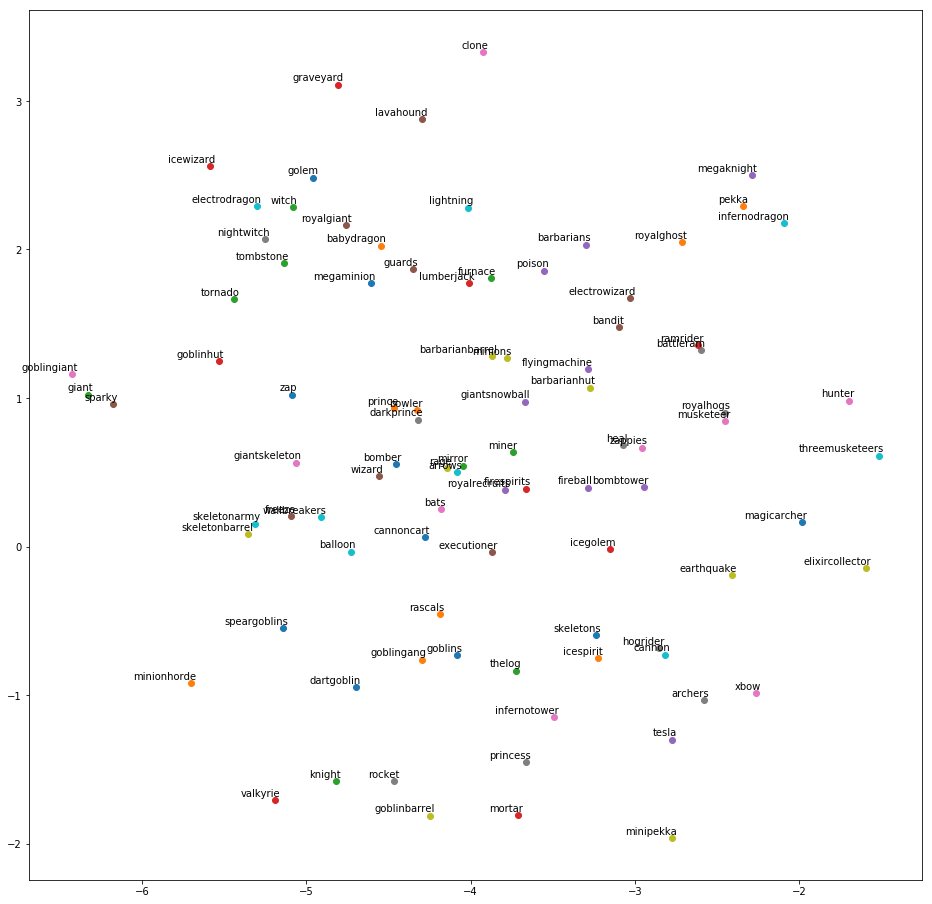

In [25]:
tsne_plot(modelWV)